# Bagging and Random Forests

## Bagging - Bootstrap Aggregation
In Bagging, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data.

**Bagging: Training**

![image-11](image-11.png)

**Bagging: Prediction**

![image-12](image-12.png)


In [1]:
import pandas as pd
breast_cancer = pd.read_csv('datasets/wbc.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
X = breast_cancer.drop(['diagnosis','Unnamed: 32'], axis =1)
y = breast_cancer['diagnosis']

In [3]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=SEED)

In [4]:
# Instantiate a classification-test 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt,
                      n_estimators=300,
                      n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

#Evaluate and print test-set accuaracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.930


## Out of Bag Evaluation
![image-13](image-13.png)


In [5]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=SEED)

In [6]:
# Instantiate a classification-test 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,
                      oob_score=True, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

In [7]:
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

#Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

#Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.924
OOB accuracy: 0.922


These results highlight how OOB-evalutaion can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation.

## Random Forests (RF) - ensemble method
- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement where, d < total number of features

**Random Forests: Training**

![image-14](image-14.png)

**Random Forests: Prediction**

![image-15](image-15.png)


In [8]:
auto = pd.read_csv('datasets/auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [13]:
X = auto.drop(['mpg','origin'],axis=1)
y = auto['mpg']

In [14]:
# Import models and utility functions
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=SEED)

In [15]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
                          min_samples_leaf=0.12,
                           random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train,y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [16]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of RF: {:.2f}'.format(rmse_test))

Test set RMSE of RF: 3.98


In [25]:
# Comaring with decision tree 
from sklearn.tree import DecisionTreeRegressor

# Instantiate model
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.12, random_state=SEED)

# Fit the model
dt.fit(X_train,y_train)

# Predict 
y_pred = dt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of DT: {:.2f}'.format(rmse_test))

Test set RMSE of DT: 4.43


Random Forest though uses Decision Tree as a base estimator, performes better than Decision Tree.

## Feature Importance
Tree based methods: enable measuring the importance of each feature in prediction

In `sklearn`:
- how much the tree nodes use a particular feature(weighted average) to reduce impurity
- accessed using the attribute `feature_importnce_`

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
importances_rf

displ     0.402240
hp        0.167550
weight    0.188745
accel     0.000024
size      0.241441
dtype: float64

In [18]:
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf

accel     0.000024
hp        0.167550
weight    0.188745
size      0.241441
displ     0.402240
dtype: float64

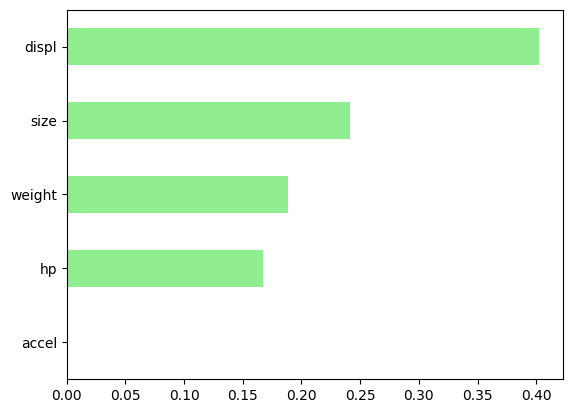

In [19]:
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh',color='lightgreen')
plt.show()